<h1><center>Performance Assessment:Data Cleaning (NUM3)</center></h1>
<h3><center> by Bader Ale <center><h3>

For this Performance Assessment, I will be using the medical data contained in the D206 Definitions and Datafile directory.

# Part 1: Research Question and Variables
The research question for this analysis is:
**Is there a relation between the amount of times the primary physician visited the patient during their hospital stay and the occurence of readmission within 30 days following the patient's discharge from the facility?**

The first thing we have to do is import the original CSV file that contains our data. To do this, we must first import the necessary packages.

In [2]:
import pandas as pd

In [3]:
# Reading in the original CSV file
df = pd.read_csv(r'C:\Users\Bader Ale\Documents\WGU MSDA\Data Cleaning - D206\Performance Assessment\Medical Data and Dictionary Files\medical_raw_data.csv')

After importing our CSV file, we will see the first 5 records of our dataframe and see the overall shape/size.

In [4]:
# Returning first 5 records of dataframe
df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Returning number of (rows, columns)
df.shape

(10000, 53)

Our dataframe has a total of 10,000 rows and 53 columns. Next, we will return a list of all variables and their dataypes.

In [6]:
# Return variables, datatypes and non-null status of each.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

# Part 2: Detection and Treatment of Duplicates
Our first task is to detect and treat any duplicated values in our entire dataset.

In [7]:
# Returning a total count of duplicated values
df.duplicated().value_counts()

False    10000
dtype: int64

Here we can see there are **no** duplicated values, represented by the "False 10000" output (which is also the total rows shown in the .shape fucntion). We can now move to the next section of data cleaning, detection and treatment of missing values.

# Part 3: Detection and Treatment of Missing Values
In this section, we will see if there are any missing values for all variables in the dataset.

In [8]:
# Returning a list of variables with total counts for missing values 
df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

Here we can see that there are 7 columns with missing values; **children**, **age**, **income**, **soft_drink**, **overweight**, **anxiety** and **initial_days**
<br>
<br>1) **Children** and **Age** are considered *discrete quantitative variables* because they can only be particular numbers
<br>2) **Income** and **Initial_days** are considered *continuous quantitative variables* because your income can be whole numbers or contain decimals
<br>3) **Overweight**, **Soft_drink** and **Anxiety** are considered *nominal qualitative variables* because they are either yes or no

We will return some basic statistics on the quantitative variables to check the before and after imputation.

In [9]:
# Checking statistical information on the columns with missing data that are quantative
df[['Children', 'Age', 'Income','Initial_days']].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


Using the seaborn package, we can create histograms of the quantitative variables **Children**, **Age**, **Income**, **Intial_days** to visually
analyze their distribution, but before we must import the seaborn package into our notebook.

In [11]:
# Importing seaborn package with the inline magic function
import seaborn as sns

%matplotlib inline 

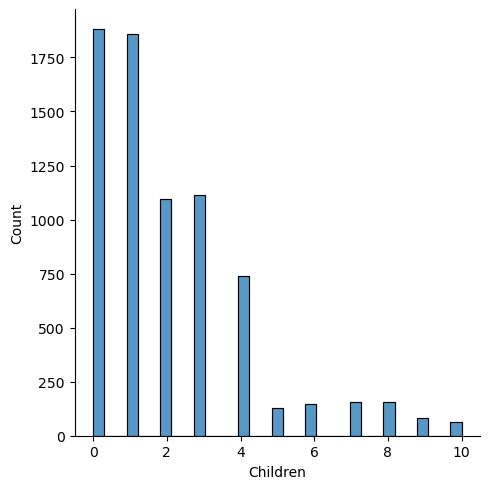

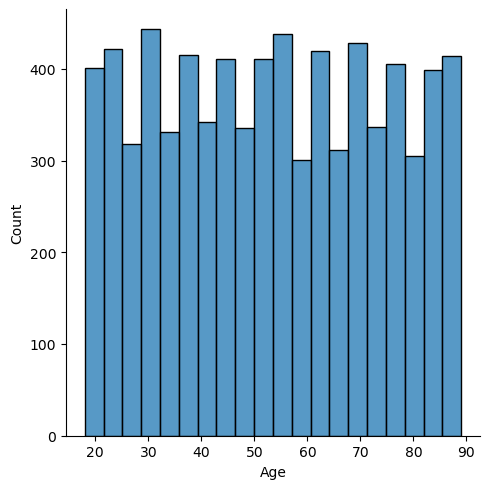

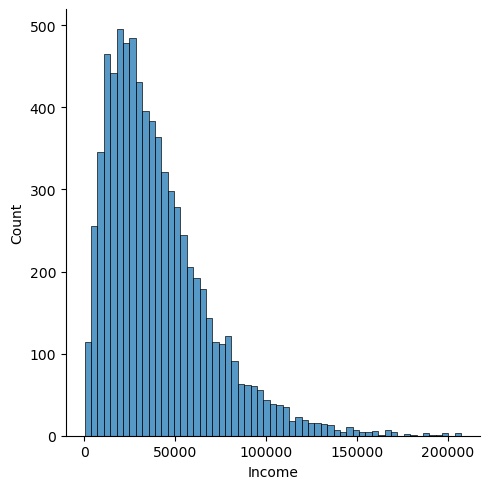

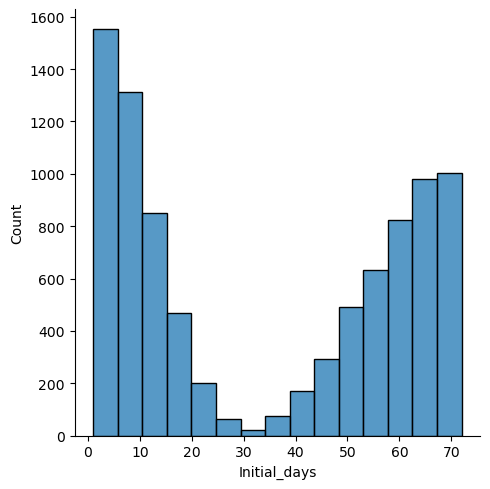

In [12]:
#Plotting histograms
sns.displot(df, x='Children')
sns.displot(df, x='Age')
sns.displot(df, x='Income')
sns.displot(df, x='Initial_days')

From these graphs, we can see that:

1) Both **Children** and **Income** are positively skewed to the right
2) **Age** is uniformly distributed 
3) **Initial_days** has a bimodal distribution

For **Income**, **Children** and **Initial_days** variables, we will treat missing values by imputation using the median value while for **Age** we will be using the mean for imputation.

In [13]:
# Performing imputation 
df['Children'].fillna(df['Children'].median(), inplace= True) # Using median value for Children
df['Income'].fillna(df['Income'].median(), inplace= True) # Using Median value for Income
df['Initial_days'].fillna(df['Initial_days'].median(), inplace= True) # Using median value for Initial_days

In [14]:
# Checking statistics again
df[['Children', 'Age', 'Income','Initial_days']].describe()

,Children,Age,Income,Initial_days
count,10000.000000,7586.000000,10000.000000,10000.000000
mean,1.814000,53.295676,38872.450471,34.433651
std,1.916969,20.659182,25042.796229,24.860232
min,0.000000,18.000000,154.080000,1.001981
25%,1.000000,35.000000,23956.162500,8.928987
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,46466.797500,59.459981
max,10.000000,89.000000,207249.130000,71.981486
